In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import xgboost
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

In [2]:
data=pd.read_csv(r"traffic volume.csv")

In [5]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [6]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [8]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [9]:
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())

In [10]:
print(data['weather'])

0              Clouds
1              Clouds
2              Clouds
3              Clouds
4              Clouds
             ...     
48199          Clouds
48200          Clouds
48201    Thunderstorm
48202          Clouds
48203          Clouds
Name: weather, Length: 48204, dtype: object


In [11]:
data['weather'] = data['weather'].fillna('Clouds')

In [12]:
data['holiday'] = data['holiday'].fillna('None')

In [13]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'holiday' and 'weather' columns
data['holiday'] = label_encoder.fit_transform(data['holiday'])
data['weather'] = label_encoder.fit_transform(data['weather'])

# Now calculate the correlation matrix with all numeric columns
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


In [15]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


<Axes: >

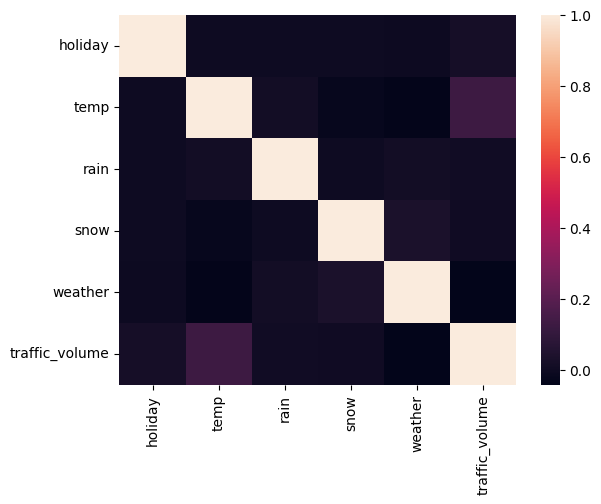

In [16]:
sns.heatmap(correlation_matrix)

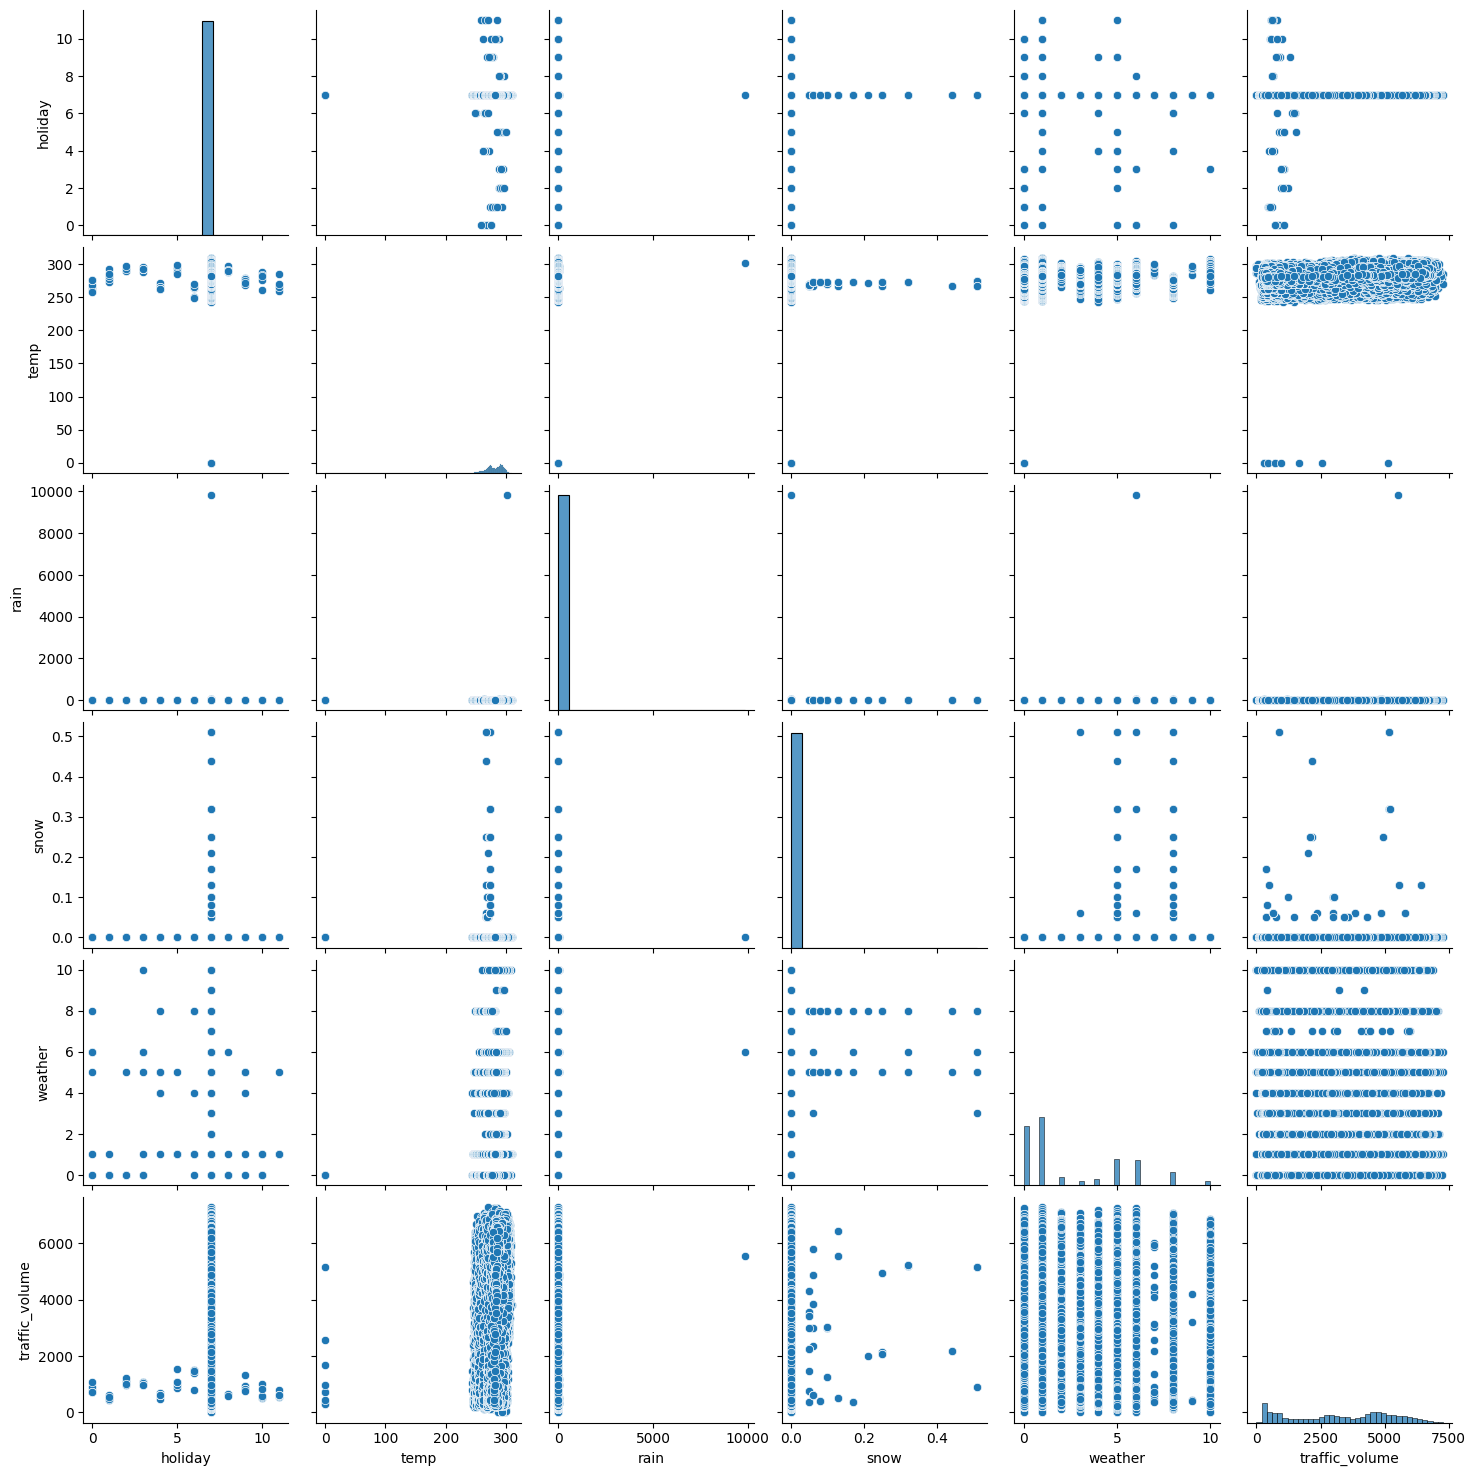

In [17]:
sns.pairplot(data)

<Axes: >

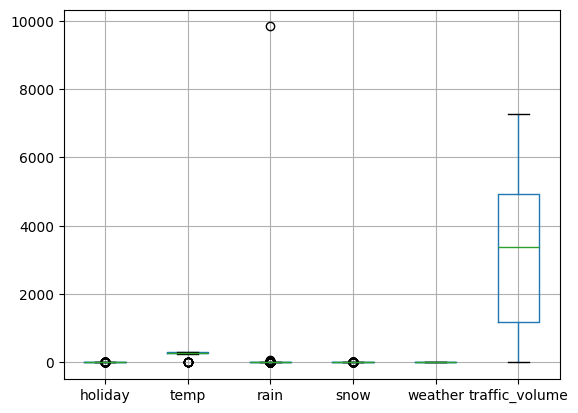

In [18]:
data.boxplot()

In [19]:
data[["day","month","year"]] = data["date"].str.split("-", expand = True)

In [20]:
data[["hours","minutes","seconds"]] = data["Time"].str.split(":", expand = True)

In [21]:
data.drop(columns=['date','Time'],axis = 1, inplace=True)

In [22]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [23]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [24]:
name = x.columns

In [26]:
from sklearn.preprocessing import scale

In [27]:
x = scale(x)

In [28]:
x = pd.DataFrame(x,columns=name)

In [29]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state = 0)

In [31]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [32]:
from sklearn import metrics

In [33]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [35]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636863
1.0
0.9748799072107537
-12.18810423138228
0.8472604751586914


In [36]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [37]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.39939639832218
0.6858529142943134
0.8036730066271507
-11.972215715232423
0.8065614104270935


In [38]:
MSE = metrics.mean_squared_error(p3,y_test)

In [39]:
np.sqrt(MSE)

np.float64(797.349921892995)

In [40]:
import pickle
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data (x)
x_scaled = scaler.fit_transform(x)

# Convert back to DataFrame (optional, to maintain column names)
x_scaled = pd.DataFrame(x_scaled, columns=name)

# Save the scaler object
pickle.dump(scaler, open("scale.pkl", 'wb'))
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(label_encoder,open("encoder.pkl",'wb'))